# SP 01 - Basics

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

[1.03052245 1.77272132]


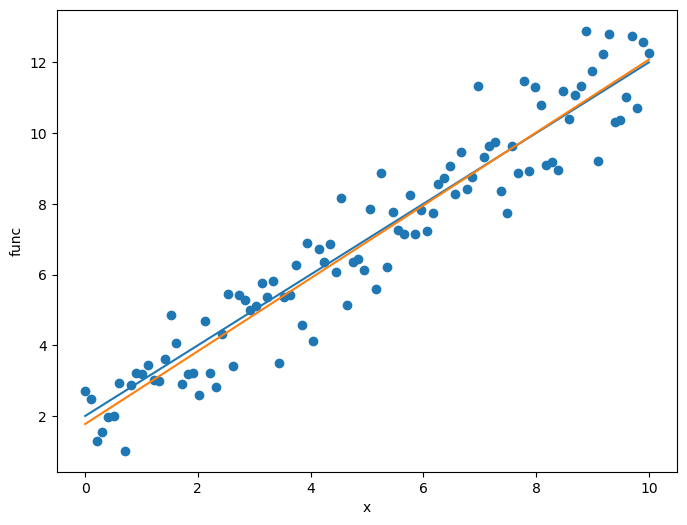

In [2]:
# Creating a function to model and create data
def func(x, a, b):
    return a*x+b

# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 2)

# Adding noise to the data
yn = y + 0.9 * np.random.normal(size=len(x))

# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

# popt returns the best fit values for parameters of the given model (func).
print(popt)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x,yn)
ax.plot(x,func(x,1,2))
ax.plot(x,func(x,popt[0],popt[1]))
ax.set_xlabel("x")
ax.set_ylabel("func")
plt.show()

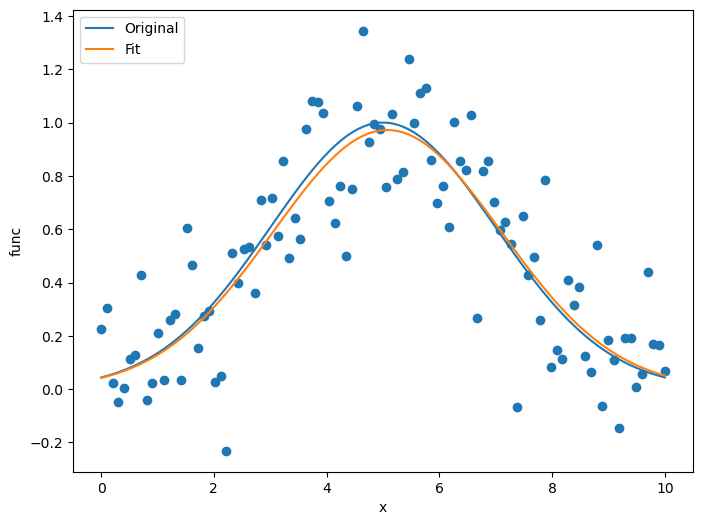

In [3]:
# Creating a function to model and create data
def func(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x,yn)
ax.plot(x,func(x,1,5,2),label='Original')
ax.plot(x,func(x,popt[0],popt[1],popt[2]),label='Fit')
ax.set_xlabel("x")
ax.set_ylabel("func")
plt.legend(loc="upper left")
plt.show()


# Nullstellen und Schnittpunkte

In [4]:
from scipy.optimize import fsolve

line = lambda x:x+3 

solution = fsolve(line, -2)
print (solution)

[-3.]


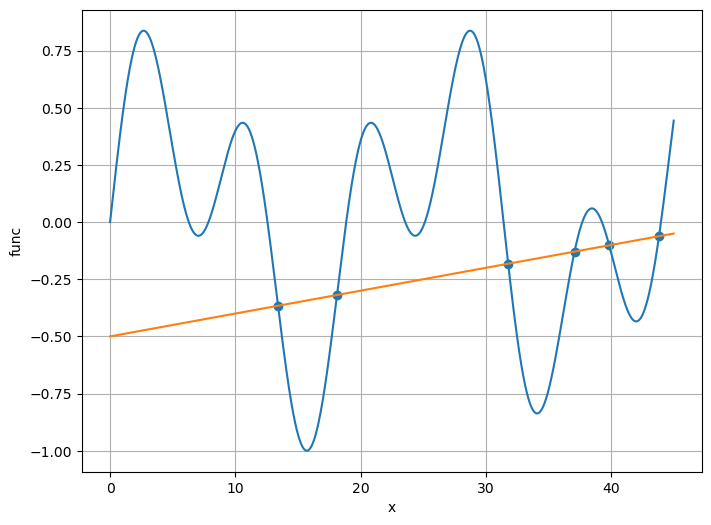

Nullstellen [(13.407730782240352, -0.3659226921775965), (18.113661284182157, -0.3188633871581784), (31.78330863134381, -0.1821669136865619), (37.07999919585498, -0.1292000080414502), (39.8483778612462, -0.10151622138753802), (43.82587750345653, -0.06174122496543466)]


In [5]:
# Schnittstelle = Nullstelle der Differenz
def findIntersection(func1, func2, x0):
    return fsolve(lambda x : func1(x) - func2(x), x0)


curve = lambda x : np.cos(x / 5) * np.sin(x / 2)
line = lambda x : 0.01 * x - 0.5

x = np.linspace(0,45,10000)
roots = findIntersection(curve, line, [15, 20, 30, 35, 40, 45])

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(roots,line(roots))

ax.plot(x,curve(x))
ax.plot(x,line(x))
ax.set_xlabel("x")
ax.set_ylabel("func")
ax.grid()
plt.show()

print(f'Nullstellen {[*zip(roots,line(roots))]}')


# Interpolation 

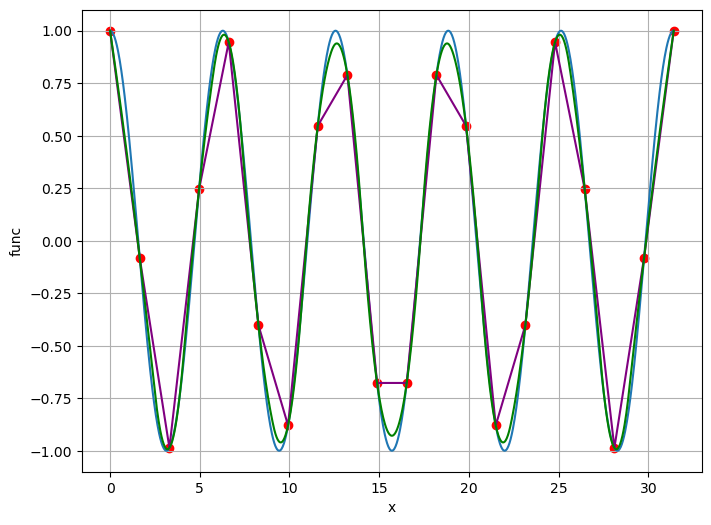

In [6]:
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(0, 10 * np.pi, 20)
y = np.cos(x)

# Interpolating data
fl = interp1d(x, y, kind='linear')
fq = interp1d(x, y, kind='quadratic')
# x.min and x.max are used to make sure we do not go beyond the boundaries of the data for the interpolation.
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
yintq = fq(xint)

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x,y,color='red')

ax.plot(xint,np.cos(xint))
ax.plot(xint,fl(xint),color='purple')
ax.plot(xint,fq(xint),color='green')
ax.set_xlabel("x")
ax.set_ylabel("func")
ax.grid()
plt.show()


In [7]:
from scipy.linalg import eig,eigh
m = np.array([1,0,0,2])
m = m.reshape(2,2)
print(m)

[[1 0]
 [0 2]]


In [8]:
print (eigh(m))

(array([1., 2.]), array([[-1.,  0.],
       [ 0.,  1.]]))


In [9]:
print(In[8])

print (eigh(m))


In [10]:
In[8]

'print (eigh(m))'

In [11]:
print(eigh.__doc__)


    Solve a standard or generalized eigenvalue problem for a complex
    Hermitian or real symmetric matrix.

    Find eigenvalues array ``w`` and optionally eigenvectors array ``v`` of
    array ``a``, where ``b`` is positive definite such that for every
    eigenvalue λ (i-th entry of w) and its eigenvector ``vi`` (i-th column of
    ``v``) satisfies::

                      a @ vi = λ * b @ vi
        vi.conj().T @ a @ vi = λ
        vi.conj().T @ b @ vi = 1

    In the standard problem, ``b`` is assumed to be the identity matrix.

    Parameters
    ----------
    a : (M, M) array_like
        A complex Hermitian or real symmetric matrix whose eigenvalues and
        eigenvectors will be computed.
    b : (M, M) array_like, optional
        A complex Hermitian or real symmetric definite positive matrix in.
        If omitted, identity matrix is assumed.
    lower : bool, optional
        Whether the pertinent array data is taken from the lower or upper
        triangle of ``a`` an